![image.png](pear.png)

***

# Welcome to Pear Inc. 

Hi there! 
My name is Robert! You can call me Bob 😉. <br>
I'm the communications officer (fancy title ha!) in our glorious company 😇.
My job is to help facilitate product development and market penetration 🤓. <br>
I spent endless hours talking to engineers, product managers, and  customers 😱  

Since we are a 20 people start-up (All of us have fancy names 😂), I also do some recruiting from time to time 💪 <br>
We are looking for **brave souls who are not afraid of a challenge and will help us** with our new product line of smart t-shirts! 🧐 <br> 

(Our CEO believes that smart t-shirts are the right direction for some reason 😅 I guess if you make something nobody needs, you won't have to sell it 🤓) <br>

Let me tell you a little bit more about our problem that you can help us with:<br>
We are creating a life changing smart t-shirt which has bluetooth and connects to your phone 🥳. They will be customizable outfits through downloaded applications. Our smart t-shirt will be developed with Google Wear OS which is a version of Google's Android operating system designed for smartwatches and other wearables. So users will be able to install custom programs through Google Play Store 🤭. <br> And we will sell them for 999.9$ a piece 💰💰💰<br>
But our engineers wanted to ensure that only Pear Inc. approved programs can be installed on our t-shirts because
market analysis showed that potential customers are afraid of ransomware that will break their "*premium*" t-shirts 🤦‍. So we need an antivirus for approving apps on the fly! <br>However, we don't want to install an off the shelf antivirus to our t-shirts 🤫, because BIG profit margins matter 🏦!

##### Enough chit-chat!
Let's get down to the business of why I contacted you: <br>
Our bright engineers came up with an algorithm that creates compressed signatures for the apps in the Google Play Store. It is called '*manifold averaging generally intelligent compressor*' or as we call it 'MAGIC'. <br>
The engineers told us that the outputs of MAGIC reflect the statistical properties of the uncompressed apps (whatever that may mean! 🤦‍). <br> MAGIC takes a Google Play Store app as an input and outputs a 4 dimensional numerical signature (they called it a vector but calling it a vector is not fancy enough for marketing! 🤪).   

Now, since these signatures are just numbers, an off the shelf antivirus can't work with them (even if it could, we can't install an off the shelf antivirus into our t-shirts -- too much computing power and space is needed). Therefore **we need a light weight proof of concept that takes these signatures as inputs and outputs labels (virus or not) for them.** We eventually want to install your program into our smart t-shirts, where it will scan a Google Play Store app (its signature to be precise!) and stop the app's execution if it thinks the app is a virus! But we are not going so far just yet so you only need to create the pipeline that take the signatures, and output labels for them. Don't worry about the rest, it is just a proof of concept at the end 😉. We are providing the dataset for you to develop your model.

In a nutshell: 
- There 4 dimensional (4 feature) numerical inputs (signatures) with labels!
- We need a simple model that takes these inputs and labels them (Virus, Not a Virus)
- We also need you to evaluate your model. Choose any metric you want, but don't forget to explain why, since I don't know much about this field (that is why we need your help!)

Things to keep in mind:
- There are less 'Virus' in the dataset than 'Not a Virus'. (Naturally!)
- While we call it MAGIC, it still sometimes doesn't work well 🤦‍, so there are signatures with missing features (missing values).
- I don't know much about these things so please show your work, your thinking process and please make it as clear as possible, otherwise I get confused 😵. (Visualizations of the data and comments in your code would be great!)

***
##### Let me describe the dataset, and you are ready to get to work!

It is a CSV file. Each row represents a signature for an app. First 4 columns from left to right represent dimensions (features) and the last column is the label (isVirus: True or False). 

- Visualize the data (so that people like me can understand!)
- Clean up the data (balance it out, impute missing values and so on... depending on the method you are going to use!)
- Visualize the cleaned data (so that people like me can understand the effect of cleaning process!)
- Create a simple model that performs reasonably well. (If it doesn't perform well, comment on why and how to improve it!)
- Evaluate the model with a testset you will create from the dataset. (Pretty plots make things easier to understand)
- Upload your code to a private github repo you can share with us, and invite us (https://github.com/tarikkranda, https://github.com/ltc0060 and https://github.com/ahmetkoklu) as collaborators so only we can see our super-secret project. 

And you are done! (Don't forget to comment, and show your work please 🤓)


### SOLUTION :


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("dataset.csv")

In [3]:
data.head(5)

,feature_1,feature_2,feature_3,feature_4,isVirus
0,-0.233467,0.308799,2.484015,1.732721,False
1,1.519003,1.238482,3.344450,0.783744,False
2,0.400640,1.916748,3.291096,-0.918519,False
3,-1.616474,0.209703,1.461544,-0.291837,False
4,1.480515,5.299829,2.640670,1.867559,True


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  1897 non-null   float64
 1   feature_2  1899 non-null   float64
 2   feature_3  1893 non-null   float64
 3   feature_4  1897 non-null   float64
 4   isVirus    1999 non-null   bool   
dtypes: bool(1), float64(4)
memory usage: 64.5 KB


### HANDLING MISSING DATA

In [5]:
data.isna().sum()

feature_1    102
feature_2    100
feature_3    106
feature_4    102
isVirus        0
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
feature_1,1897.0,0.814404,1.729538,-2.285499,-0.556433,0.084789,2.270955,5.929096
feature_2,1899.0,1.795843,1.605611,-7.363119,0.975148,1.881904,2.840511,7.549658
feature_3,1893.0,2.621096,1.474973,-5.363119,1.671905,2.499623,3.470200,9.549658
feature_4,1897.0,0.807499,1.768597,-3.006499,-0.563357,0.021857,2.319822,5.759355


As can be seen above, in **feature_1** and **feature_4** there is **a gap between mean and median**. Thus we need to choose imputation method carefully. Since the medians are small, **imputating with median** would not affect mean drastically.

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
df = imputer.fit_transform(data)
df = pd.DataFrame(df, columns = ["feature_1","feature_2","feature_3","feature_4","isVirus"])

In [8]:
df.isna().sum()

feature_1    0
feature_2    0
feature_3    0
feature_4    0
isVirus      0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
feature_1,1999.0,0.777175,1.692448,-2.285499,-0.531888,0.084789,2.185465,5.929096
feature_2,1999.0,1.800148,1.565027,-7.363119,1.023208,1.881904,2.792420,7.549658
feature_3,1999.0,2.614655,1.435572,-5.363119,1.719963,2.499623,3.412488,9.549658
feature_4,1999.0,0.767411,1.731518,-3.006499,-0.538374,0.021857,2.177811,5.759355
isVirus,1999.0,0.333667,0.471640,0.000000,0.000000,0.000000,1.000000,1.000000


# Exploratory Data Analysis

This code creates a bar plot of the counts of observations in each category of the "isVirus" variable, which is a binary dependent variable. This plot can be used to visualize the distribution of the target variable and see how many observations belong to each category. As can be seen, distribution is imbalanced.

<AxesSubplot:xlabel='isVirus', ylabel='count'>

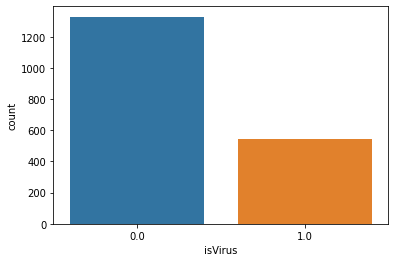

In [17]:
sns.countplot(x = df.isVirus, data = df)

This code below creates a **box plot** for each feature in the data set. The box plot displays the **five-number summary** of the data, which includes **the minimum value, the first quartile (Q1), the median, the third quartile (Q3), and the maximum value**.

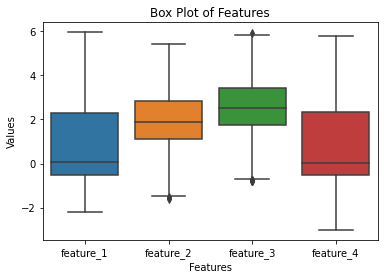

In [59]:
sns.boxplot(data = df.iloc[:,:-1])
plt.title("Box Plot of Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

There seems **feature_2 and feature_3** have outliers. To look further effects of outliers scatter plots have been plotted 

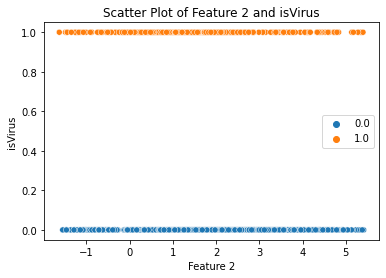

In [60]:
sns.scatterplot(x = "feature_2", y = "isVirus", hue = "isVirus", data = df)
plt.title("Scatter Plot of Feature 2 and isVirus")
plt.xlabel("Feature 2")
plt.ylabel("isVirus")
plt.legend()
plt.show()

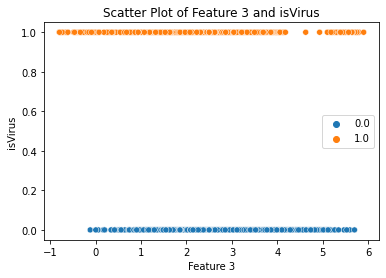

In [61]:
sns.scatterplot(x = "feature_3", y = "isVirus", hue = "isVirus", data = df)
plt.title("Scatter Plot of Feature 3 and isVirus")
plt.xlabel("Feature 3")
plt.ylabel("isVirus")
plt.legend()
plt.show()

We will be using **the interquartile range (IQR) method** for **outlier detection** using. The IQR is a measure of variability that is based on the difference between the 75th and 25th percentiles of the data. 

In [63]:
# Identify outliers in the data set
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

print("Dimensions of the data frame before removing outliers:", df.shape)

# Remove the outliers from the dataset
df = df[~outliers]

print("Dimensions of the data frame after removing outliers:", df.shape)

Dimensions of the data frame before removing outliers: (1860, 5)
Dimensions of the data frame after removing outliers: (1858, 5)


Below the visualization of the distributions of the features after removing outliers.

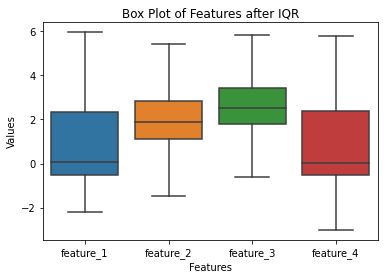

In [66]:
sns.boxplot(data = df.iloc[:,:-1])
plt.title("Box Plot of Features after IQR")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

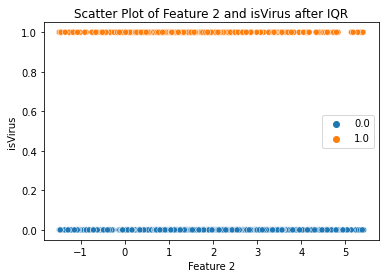

In [67]:
sns.scatterplot(x = "feature_2", y = "isVirus", hue = "isVirus", data = df)
plt.title("Scatter Plot of Feature 2 and isVirus after IQR")
plt.xlabel("Feature 2")
plt.ylabel("isVirus")
plt.legend()
plt.show()

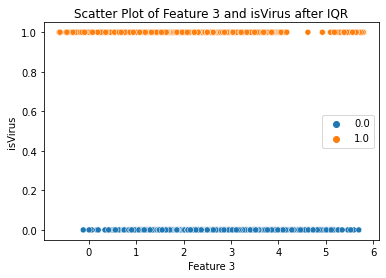

In [68]:
sns.scatterplot(x = "feature_3", y = "isVirus", hue = "isVirus", data = df)
plt.title("Scatter Plot of Feature 3 and isVirus after IQR")
plt.xlabel("Feature 3")
plt.ylabel("isVirus")
plt.legend()
plt.show()

This code creates a grid of pairwise scatter plots of the features in the data frame, with each plot showing the relationship between two variables. The plots are color-coded according to the "isVirus" variable, which can help to visualize the relationship between the features and the target variable. Also heatmap shows relationship between features.

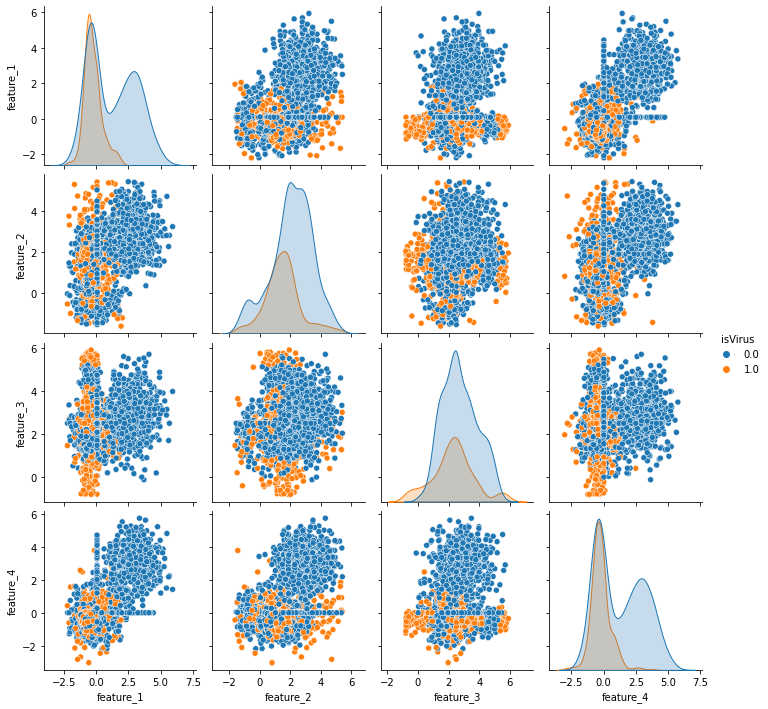

In [18]:
sns.pairplot(hue = "isVirus", data = df)

<AxesSubplot:>

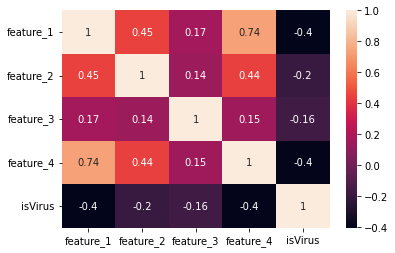

In [19]:
sns.heatmap(df.corr(), annot = True)

Relationships are linear but there is not many features so PCA will not be used

#SPLITTING DATASET INTO TEST AND TRAIN

In [20]:
from sklearn.model_selection import train_test_split

Splitting passed by **stratify** which is the parameter ensures that the proportion of viruses in the training and testing sets is the same as the proportion of viruses in the original data frame, which can **help dataset's imbalance**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df["isVirus"],
                                                    test_size = 0.2, 
                                                    stratify = df["isVirus"],
                                                    random_state = 42)

In [69]:
# Install the xgboost and lightgbm packages
!pip install xgboost
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#PREPROCESSING

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

The **MinMaxScaler** scales the features to a **range of 0 to 1, based on the minimum and maximum values** of each feature in the training set. This helps to **normalize the features** and make them **more comparable across different scales**, which can improve the performance of some machine learning algorithms.

In [24]:
# Initialize the scaler object
scaler = MinMaxScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Scale the training data
X_train_scaled = scaler.transform(X_train)

There different models, *logistic regression, XGradientBoosting, LightGradientBoosting*, will be fitted through and best model will be selected.

In [70]:
# Initialize the models
logreg = LogisticRegression(solver = "liblinear", random_state = 42)
xgb = XGBClassifier(random_state = 42)
lgbm = LGBMClassifier(random_state = 42)

In [72]:
# Initialize the pipelines
pipe_logreg = Pipeline([
    ("scaler", scaler),
    ("model", logreg)
])

pipe_xgb = Pipeline([
    ("scaler", scaler),
    ("model", xgb)
])

pipe_lgbm = Pipeline([
    ("scaler", scaler),
    ("model", lgbm)
])

#HYPERMETER TUNING AND MODEL SELECTION

For performance of model we will be fitting X_train with 5-fold cross validation to models with different hypermeters.

In [27]:
param_grid_logreg = {'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                     'model__penalty': ['l1', 'l2'],
                     'model__max_iter': [100, 500, 1000]}

param_grid_xgb = {'model__n_estimators': [100, 500, 1000],
              'model__max_depth': [3, 5, 7],
              'model__learning_rate': [0.01, 0.1, 0.3],
              'model__subsample': [0.5, 0.7, 1]}

param_grid_lgbm = {'model__n_estimators': [100, 500, 1000],
                   'model__max_depth': [3, 5, 7],
                   'model__learning_rate': [0.01, 0.1, 0.3],
                   'model__subsample': [0.5, 0.7, 1]}

F1 will be used as scoring, because dataset is imbalanced

In [28]:
%%time
random_search_logreg = GridSearchCV(pipe_logreg, param_grid_logreg,
                                          cv=5, n_jobs=-1, scoring = "f1")

random_search_logreg.fit(X_train, y_train)

pipeline_logreg = random_search_logreg.best_estimator_

CPU times: user 521 ms, sys: 76.9 ms, total: 598 ms
Wall time: 6.36 s


In [29]:
%%time
random_search_xgb = GridSearchCV(pipe_xgb, param_grid_xgb,
                                       cv=5, n_jobs=-1, scoring = "f1")

random_search_xgb.fit(X_train, y_train)

pipeline_xgb = random_search_xgb.best_estimator_

CPU times: user 4.95 s, sys: 230 ms, total: 5.18 s
Wall time: 3min 35s


In [30]:
%%time
random_search_lgbm = GridSearchCV(pipe_lgbm, param_grid_lgbm,
                                       cv=5, n_jobs=-1, scoring = "f1")

random_search_lgbm.fit(X_train, y_train)

pipeline_lgbm = random_search_lgbm.best_estimator_

CPU times: user 3.55 s, sys: 137 ms, total: 3.69 s
Wall time: 1min 23s


In [31]:
pipelines = [pipeline_logreg, pipeline_xgb, pipeline_lgbm]

In [32]:
model_scores = []
for p in pipelines:
    score = cross_val_score(p, X_train, y_train,
                            cv=5, scoring="f1")
    model_scores.append([p,score.mean()])

As can be seen XGB is the best model

In [33]:
model_scores_df = pd.DataFrame(model_scores)
model_scores_df.columns = ["pipelines", "f1_score"]
model_scores_df

,pipelines,f1_score
0,"(MinMaxScaler(), LogisticRegression(C=100, pen...",0.333472
1,"(MinMaxScaler(), XGBClassifier(base_score=None...",0.760250
2,"(MinMaxScaler(), LGBMClassifier(learning_rate=...",0.755253


In [34]:
best_pipe = model_scores_df.pipelines[model_scores_df.f1_score.idxmax()]

In [35]:
X_train_scaled = best_pipe.named_steps["scaler"].fit_transform(X_train)

In [36]:
best_pipe.named_steps["model"].fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [37]:
y_train_pred = best_pipe.named_steps["model"].predict(X_train_scaled)

In [48]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, ConfusionMatrixDisplay

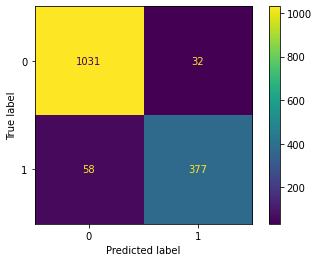

In [39]:
cm = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(cm).plot()

In [41]:
X_test_scaled = best_pipe.named_steps["scaler"].transform(X_test)

In [50]:
y_pred_test = best_pipe.named_steps["model"].predict(X_test_scaled)

In [57]:
print("Accuracy score is", accuracy_score(y_test, y_pred_test)*100,"%")

Accuracy score is 88.0 %
